# Import

In [212]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

from hnc.hnc.PIE import Plasma_of_Ions_and_Electrons as PLASMA

from hnc.hnc.constants import *
from hnc.hnc.misc import n_from_rs, rs_from_n

from pandas import read_csv

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
                
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")

P_hnc_to_AU   = lambda P_hnc, ri: (P_hnc/ri**3) 


In [221]:
ni_cc*A*amu_to_AU*AU_to_g

2.1962156838270737

In [285]:
ni_cc = 1.102160000305041e+23
ri_cm = rs_from_n(ni_cc)
ri_AU = ri_cm*cm_to_AU

Te_eV = 10
Ti_eV = 10

### Carbon

In [286]:
Z, A = 6 , 12
mi = m_p * A

In [294]:
atom_C = PLASMA(Z, A, ni_cc, Ti_eV, Te_eV, Zbar=2, find_βuee=False,
                 βu_options = {'add_bridge':False,'bridge':'yukawa', 'pseudopotential':False}, 
                 qsp_options = {'Te_c_type':'classical'},
                 hnc_options={'kappa_multiscale':1, 'R_max':10,'N_bins':1000,'oz_method':'standard'},
                 hnc_solve_options={'alpha_Picard':1e-1,'verbose':False},
                 root_options={'options':{'maxfev':50000,'xtol':1e-14}})

Te_in_eV: 10.000
Ti_in_eV: 10.000


In [295]:
from hnc.hnc.misc import ThomasFermiZbar, Fermi_Energy

ThomasFermiZbar( 6, ni_cc, Ti_eV)
Fermi_Energy(ni_cc*invcc_to_AU), Fermi_Energy(atom_C.qsp.Zbar*ni_cc*invcc_to_AU)*AU_to_eV 

(0.3080463264123341, 13.306177931336725)

In [284]:
2e-7*cm_to_AU/20, 2*atom_C.qsp.Λee*ri_AU

(1.88972612462577, 1.8613599866097967)

In [282]:
atom_C.qsp.Γii, atom_C.qsp.Λee, atom_C.qsp.Λei

(4.451668720615047, 0.38063839718823045, 0.26915809946065355)

In [204]:
atom_C.run_hnc(newton=False)
# solve_least_squares(atom, np.linspace(atom.hnc.k_array[0], atom.hnc.k_array[-1], num=100))

0: Initial condition Total Error: 1.352e+06


/home/zach/plasma/hnc/hnc/hnc.py:636: RuntimeWarning: overflow encountered in exp
  hnc_err = np.linalg.norm(- 1 - self.h_r_matrix   + np.exp( -self.βu_r_matrix + self.h_r_matrix - self.c_r_matrix ))/np.sqrt(self.N_bins*self.N_species**2)
/home/zach/plasma/hnc/hnc/hnc.py:420: RuntimeWarning: overflow encountered in exp
  tot_eqn =  1 + h_r_matrix  - np.exp(-self.βu_s_r_matrix + h_r_matrix - c_s_r_matrix )
/home/zach/plasma/hnc/hnc/hnc.py:506: RuntimeWarning: overflow encountered in exp
  h_r_matrix = -1 + np.exp(γs_r_matrix - self.βu_s_r_matrix) # 2. γ_r,u_s_r  -> h_r   (HNC)
/home/zach/plasma/hnc/hnc/hnc.py:644: RuntimeWarning: invalid value encountered in subtract
  Δ_err = np.array(self.tot_err_list[-iters_to_check:-2]) - np.array(self.tot_err_list[-iters_to_check + 1:-1])


QUIT: Total error infinite.
Exiting status 1, reverting to best index so far: 0
Final iter:21, Total Error: 1.352e+06


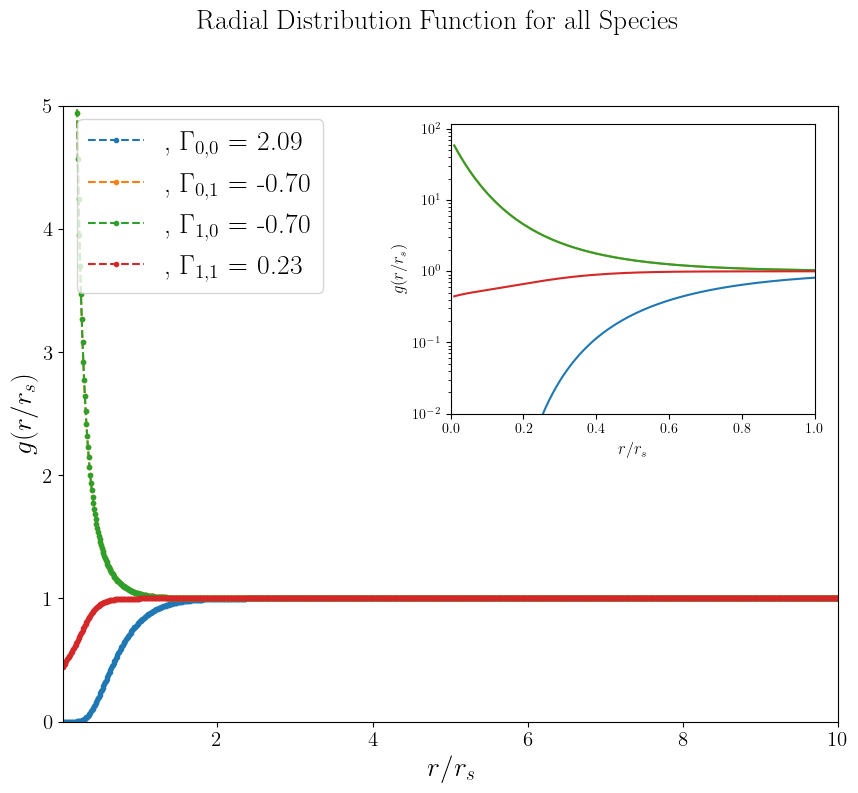

(<Figure size 1000x800 with 1 Axes>,
 <Axes: xlabel='$r/r_s$', ylabel='$g(r/r_s)$'>)

In [190]:
atom_C.hnc.plot_g_all_species()

### Hydrogen

In [196]:
Z, A = 1 , 1
mi = m_p * A

In [197]:
atom_H = PLASMA(Z, A, ni_cc, Ti_eV, Te_eV, Zbar=1, find_βuee=False,
                 βu_options = {'add_bridge':False,'bridge':'yukawa', 'pseudopotential':False}, 
                 qsp_options = {'Te_c_type':'classical'},
                 hnc_options={'kappa_multiscale':1, 'R_max':10,'N_bins':1000,'oz_method':'standard'},
                 hnc_solve_options={'alpha_Picard':1e-1,'verbose':False},
                 root_options={'options':{'maxfev':50000,'xtol':1e-14}})

Te_in_eV: 20.000
Ti_in_eV: 20.000


In [198]:
atom_H.run_hnc(newton=False)
# solve_least_squares(atom, np.linspace(atom.hnc.k_array[0], atom.hnc.k_array[-1], num=100))

0: Initial condition Total Error: 7.741e-01
Exiting status 0, reverting to best index so far: 172
Final iter:173, Total Error: 9.519e-09


### Pressures

In [199]:
print(f"For T={Ti_eV:0.2f} [eV]")
print("------------------------------")
P_id_C, P_ex_C = P_hnc_to_AU(atom_C.hnc.ideal_pressure(),atom_C.qsp.ri),P_hnc_to_AU(atom_C.hnc.excess_pressure(),atom_C.qsp.ri)
print(f"Carbon: P_id = {P_id_C:0.3f} [au], P_ex = {P_ex_C:0.3f} [au], P_tot = {P_ex_C+P_id_C:0.3f} [au]" )
print(f"Carbon: P_ex/P_id = {P_ex_C/P_id_C:0.3f}")
print("________________________________")
P_id_H, P_ex_H = P_hnc_to_AU(atom_H.hnc.ideal_pressure(),atom_H.qsp.ri),P_hnc_to_AU(atom_H.hnc.excess_pressure(),atom_H.qsp.ri)
print(f"Hydrogen: P_id = {P_id_H:0.3f} [au], P_ex = {P_ex_H:0.3f} [au], P_tot = {P_ex_H+P_id_H:0.3f} [au]" )
print(f"Hydrogen: P_ex/P_id = {P_ex_H/P_id_H:0.3f}")

For T=20.00 [eV]
------------------------------
Carbon: P_id = 0.115 [au], P_ex = -0.019 [au], P_tot = 0.096 [au]
Carbon: P_ex/P_id = -0.163
________________________________
Hydrogen: P_id = 0.024 [au], P_ex = -0.002 [au], P_tot = 0.022 [au]
Hydrogen: P_ex/P_id = -0.083


For T=50.00 [eV]
------------------------------
Carbon: P_id = 0.120 [au], P_ex = -0.019 [au], P_tot = 0.101 [au]
Carbon: P_ex/P_id = -0.157
________________________________
Hydrogen: P_id = 0.060 [au], P_ex = -0.002 [au], P_tot = 0.058 [au]
Hydrogen: P_ex/P_id = -0.030